# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Malak Saleh

ID: 58-15339

Tutorial: 8

---

Name: Jana Salama

ID: 58-4500

Tutorial: 8

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In order to be able to view dataframe summary such as the columns, data types, count of non-null values and memory usage of the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


Data inspection results shows that:

-Building_Type, Governorate, and Average_Temperature have missing values

-SquareFootage and Energy_Consuption are supposed to be of numeric data type

-Last_Maintenance_Date is supposed to be datetime not object

-Columns like Day_of_Week, SquareFootage and Neighborhood have inconsistent entries.



## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

1. Dealing with missing values:
---
 Building_Type has missing values and it's categorical, the suitable method for dealing with it that i found is imputing these missing values with the mode (most frequent value)

 Governorate missing values will be replaced with "unknown" as it may represent an area not recorded.

 Average_Temperature missing values will be replaced with mean

In [ ]:
df['Building_Type'] = df['Building_Type'].fillna(df['Building_Type'].mode()[0])
df['Governorate'] = df['Governorate'].fillna('Unknown')
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())

df.head()


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.610000,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,33.499404,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.880000,4101.24 kWh
3,BLD-1003-HE,Residential,Unknown,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.060000,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.820000,3279.17 kWh


 2.Converting Data Types

-For SquareFootage we need to remove the unit found in some rows and covert it to numeric

-for energy consumption as well, we don't need the unit so it should be converted to numeric

-For Last_Maintenance_Date we will convert data type to datetime

In [ ]:
df['SquareFootage'] = df['SquareFootage'].str.replace('m2','').astype(float)
df['Energy_Consumption'] = df['Energy_Consumption'].str.replace(' kWh','').astype(float)
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'])
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063.0,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372.0,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255.0,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,Residential,Unknown,+92Dokki,TuesDay,Low,High,13265.0,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.820000,3279.17


3.Fixing inconsistencies

-Day_of_Week has inconsistencies in capitalization so it should be standardized using the .str.capitalize()

-Neighborhood too has extra symbols that should be removed to keep consistent names

In [ ]:
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize()
df['Neighborhood'] = df['Neighborhood'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063.0,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372.0,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255.0,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,Residential,Unknown,Dokki,Tuesday,Low,High,13265.0,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.820000,3279.17


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

TOP 3 ARE : Smouha, Dokki and Gleem

For visualization a bar chart is used to represent numerical values showing number of buildings in each neighborhood indicating its popularity. The top 3 neighborhoods are in red for emphasis and its also sorted to directly show the top 3

/tmp/ipython-input-772432021.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette=colors)


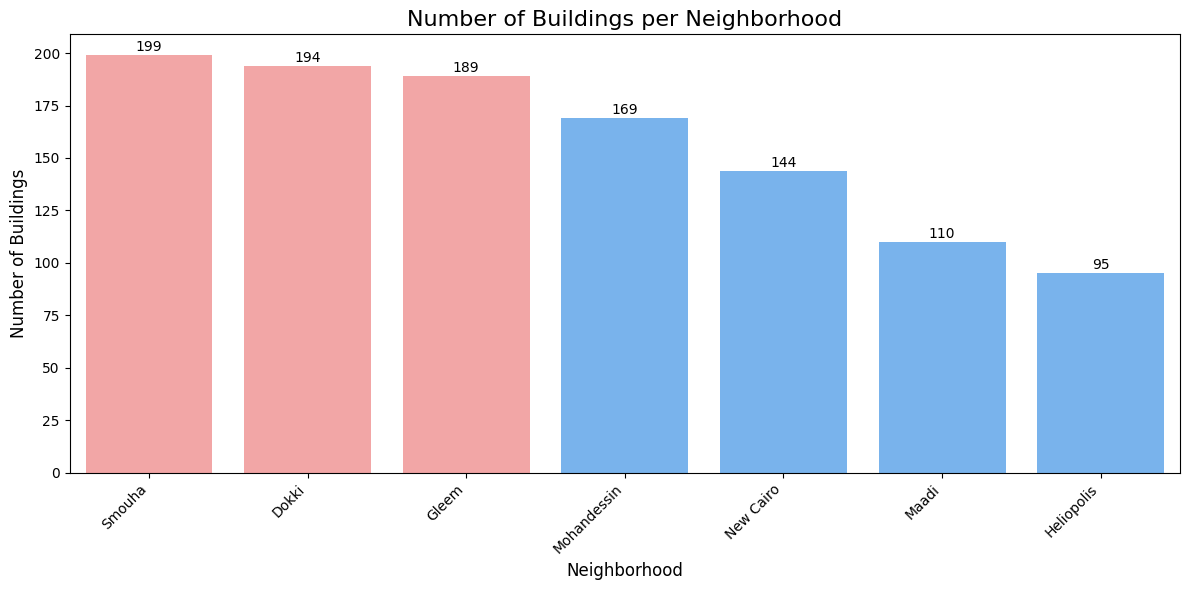

In [ ]:
neighborhood_counts = df['Neighborhood'].value_counts()

colors = ['#ff9999' if i < 3 else '#66b3ff' for i in range(len(neighborhood_counts))]

plt.figure(figsize=(12,6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette=colors)
for i, count in enumerate(neighborhood_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.title("Number of Buildings per Neighborhood", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Buildings", fontsize=12)
plt.tight_layout()
plt.show()


**Answer for Q1:** Top 3 most popular neighborhoods are Smouha, Dokki and Gleem
| Rank | Neighborhood | Number of Buildings |
|------|-------------|-------------------|
| 1    | Smouha      | 199                |
| 2    | Dokki       | 194                 |
| 3    | Gleem       | 189                 |

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

A box plot is best option as it clearly displays the spread and median of energy consumption for each building type

/tmp/ipython-input-4194436703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


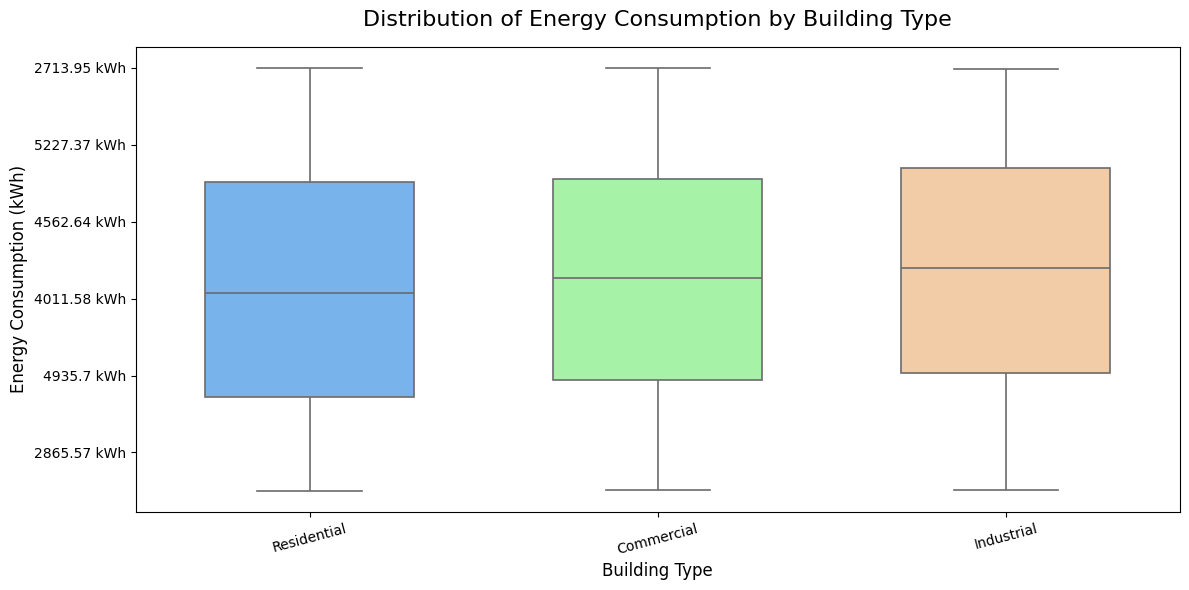

In [10]:
energy_data_by_type = df[['Building_Type', 'Energy_Consumption']]


plt.figure(figsize=(12,6))
sns.boxplot(
    data=energy_data_by_type,
    x='Building_Type',
    y='Energy_Consumption',
    palette=['#66b3ff', '#99ff99', '#ffcc99'],
    width=0.6,
    linewidth=1.2
)


plt.title("Distribution of Energy Consumption by Building Type", fontsize=16, pad=15)
plt.xlabel("Building Type", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=15)
plt.grid(False)


import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=8))  # Show max 8 ticks

plt.tight_layout()
plt.show()

**Answer for Q2:** _Your answer here_

Industrial buildings have both the widest distribution of energy consumption and the highest average consumption with the highest IQR and the highest median line

**Q3:** How does the building size affect energy consumption?

**Visualization**

**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

 Feature engineering: The following 2 columns are  feature engineered from our data

-Days_since_last_maintenance indicates the number of days passed since
the building was last maintained

-Day_Type categorizes days of the week as either weekend or weekdays

In [ ]:
df['Days_since_last_maintenance'] = (pd.Timestamp('today') - df['Last_Maintenance_Date']).dt.days
df['Day_type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Day_type
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063.0,2020-01-01,28.610000,2713.95,2120,Weekday
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372.0,2022-02-24,33.499404,5744.99,1335,Weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255.0,2021-02-22,37.880000,4101.24,1702,Weekend
3,BLD-1003-HE,Residential,Unknown,Dokki,Tuesday,Low,High,13265.0,2023-07-30,35.060000,3009.14,814,Weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.820000,3279.17,1166,Weekday


Selecting columns for data modelling

Dropped Building_ID is an identifier so it is not useful for prediction

Last_Maintenance_Date is not needed since we already derived the Days_since_last_maintenance from it

same for Day_of_week since we derived Day_type from it

Rest of the features kept as they are.

In [ ]:

df_model = df.copy()
df_model = df_model.drop(columns=['Building_ID', 'Day_of_Week', 'Last_Maintenance_Date'])
df_model.head()

,Building_Type,Governorate,Neighborhood,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Day_type
0,Residential,Alexandria,Smouha,High,Low,7063.0,28.610000,2713.95,2120,Weekday
1,Commercial,Giza,Mohandessin,High,High,44372.0,33.499404,5744.99,1335,Weekday
2,Industrial,Cairo,New Cairo,Medium,Low,19255.0,37.880000,4101.24,1702,Weekend
3,Residential,Unknown,Dokki,Low,High,13265.0,35.060000,3009.14,814,Weekday
4,Commercial,Alexandria,Smouha,Low,Low,13375.0,28.820000,3279.17,1166,Weekday


now we will apply the appropriate categorical encoding methods because for linear regression categorical variables should be converted into numerical

-For occupancy_Level and Appliances_Usage_Level Ordinal encoding is used since each of them is categorized at low, medium and high.

In [ ]:
mapping = {'Low':0, 'Medium':1, 'High':2}
df_model['Occupancy_Level'] = df['Occupancy_Level'].map(mapping)
df_model['Appliances_Usage_Level'] = df['Appliances_Usage_Level'].map(mapping)
df_model.head()

,Building_Type,Governorate,Neighborhood,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Day_type
0,Residential,Alexandria,Smouha,2,0,7063.0,28.610000,2713.95,2120,Weekday
1,Commercial,Giza,Mohandessin,2,2,44372.0,33.499404,5744.99,1335,Weekday
2,Industrial,Cairo,New Cairo,1,0,19255.0,37.880000,4101.24,1702,Weekend
3,Residential,Unknown,Dokki,0,2,13265.0,35.060000,3009.14,814,Weekday
4,Commercial,Alexandria,Smouha,0,0,13375.0,28.820000,3279.17,1166,Weekday


for the rest of categorical columns: Building_Type, Governorate, Neighborhood, and Day_type we will use one-hot encoding because they are nominal categorical values meaning that there's no rank/order.
Also drop_first is added to remove one of the categories from each column to avoid multicollinearity which supports the independence assumption for linear regression (lec 5)

In [ ]:
nominal_cols = ['Building_Type', 'Governorate', 'Neighborhood', 'Day_type']
existing_nominal_cols = [col for col in nominal_cols if col in df_model.columns]

df_model = pd.get_dummies(
    df_model,
    columns=existing_nominal_cols,
    drop_first=True,
    dtype=int
)
df_model.head()


,Building_ID,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Building_Type_Industrial,...,Governorate_Cairo,Governorate_Giza,Governorate_Unknown,Neighborhood_Gleem,Neighborhood_Heliopolis,Neighborhood_Maadi,Neighborhood_Mohandessin,Neighborhood_New Cairo,Neighborhood_Smouha,Day_type_Weekend
0,BLD-1000-UD,Wednesday,High,Low,7063.0,2020-01-01,28.610000,2713.95,2120,0,...,0,0,0,0,0,0,0,0,1,0
1,BLD-1001-AX,Tuesday,High,High,44372.0,2022-02-24,33.499404,5744.99,1335,0,...,0,1,0,0,0,0,1,0,0,0
2,BLD-1002-IH,Sunday,Medium,Low,19255.0,2021-02-22,37.880000,4101.24,1702,1,...,1,0,0,0,0,0,0,1,0,1
3,BLD-1003-HE,Tuesday,Low,High,13265.0,2023-07-30,35.060000,3009.14,814,0,...,0,0,1,0,0,0,0,0,0,0
4,BLD-1004-XD,Monday,Low,Low,13375.0,2022-08-12,28.820000,3279.17,1166,0,...,0,0,0,0,0,0,0,0,1,0


Now we will be Normalizing the independent numeric values:

In [ ]:
numerical_columns = ['SquareFootage', 'Days_since_last_maintenance']
df_model[numerical_columns] = (df_model[numerical_columns] - df_model[numerical_columns].min()) / \
                              (df_model[numerical_columns].max() - df_model[numerical_columns].min())
df_model.head()

,Building_ID,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_since_last_maintenance,Building_Type_Industrial,...,Governorate_Cairo,Governorate_Giza,Governorate_Unknown,Neighborhood_Gleem,Neighborhood_Heliopolis,Neighborhood_Maadi,Neighborhood_Mohandessin,Neighborhood_New Cairo,Neighborhood_Smouha,Day_type_Weekend
0,BLD-1000-UD,Wednesday,High,Low,0.131541,2020-01-01,28.610000,2713.95,1.000000,0,...,0,0,0,0,0,0,0,0,1,0
1,BLD-1001-AX,Tuesday,High,High,0.886219,2022-02-24,33.499404,5744.99,0.570099,0,...,0,1,0,0,0,0,1,0,0,0
2,BLD-1002-IH,Sunday,Medium,Low,0.378158,2021-02-22,37.880000,4101.24,0.771084,1,...,1,0,0,0,0,0,0,1,0,1
3,BLD-1003-HE,Tuesday,Low,High,0.256994,2023-07-30,35.060000,3009.14,0.284775,0,...,0,0,1,0,0,0,0,0,0,0
4,BLD-1004-XD,Monday,Low,Low,0.259219,2022-08-12,28.820000,3279.17,0.477547,0,...,0,0,0,0,0,0,0,0,1,0


## Modelling

_Apply the linear regression model below._

## Model Evaluation

Evaluate the model you applied.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.